<a href="https://colab.research.google.com/github/Rathod07/PCOSClassificationML/blob/main/Copy_of_PCOS_prediction_using_different_classifiers_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openpyxl==3.0.9

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.1 MB 1.3 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from catboost import CatBoostClassifier

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Reading the data using pandas

In [ ]:
df=pd.read_excel('sample data/PCOS_data_without_infertility.xlsx',sheet_name='Full_new')

NameError: ignored

'sheet_name' used because the data is on 'full new 'shee




displaying first 5 values

In [ ]:
df.head(5)

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1.0,1.0,0.0,28.0,44.6,152.0,19.300000,15.0,78.0,22.0,10.48,2.0,5.0,7.0,0.0,0.0,1.99,1.99,7.95,3.68,2.160326,36.0,30.0,0.833333,0.68,2.07,45.16,17.1,0.57,92.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,110.0,80.0,3.0,3.0,18.0,18.0,8.5,NaN
1,2.0,2.0,0.0,36.0,65.0,161.5,24.921163,15.0,74.0,20.0,11.70,2.0,5.0,11.0,1.0,0.0,60.80,1.99,6.73,1.09,6.174312,38.0,32.0,0.842105,3.16,1.53,20.09,61.3,0.97,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,70.0,3.0,5.0,15.0,14.0,3.7,NaN
2,3.0,3.0,1.0,33.0,68.8,165.0,25.270891,11.0,72.0,18.0,11.80,2.0,5.0,10.0,1.0,0.0,494.08,494.08,5.54,0.88,6.295455,40.0,36.0,0.900000,2.54,6.63,10.52,49.7,0.36,84.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,120.0,80.0,13.0,15.0,18.0,20.0,10.0,NaN
3,4.0,4.0,0.0,37.0,65.0,148.0,29.674945,13.0,72.0,20.0,12.00,2.0,5.0,4.0,0.0,0.0,1.99,1.99,8.06,2.36,3.415254,42.0,36.0,0.857143,16.41,1.22,36.90,33.4,0.36,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,70.0,2.0,2.0,15.0,14.0,7.5,NaN
4,5.0,5.0,0.0,25.0,52.0,161.0,20.060954,11.0,72.0,18.0,10.00,2.0,5.0,1.0,1.0,0.0,801.45,801.45,3.98,0.90,4.422222,37.0,30.0,0.810811,3.57,2.26,30.09,43.8,0.38,84.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,120.0,80.0,3.0,4.0,16.0,14.0,7.0,NaN


In [ ]:
df.tail(5)

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
536,537.0,537.0,0.0,35.0,50.0,164.592,18.5,17.0,72.0,16.0,11.0,2.0,5.0,8.0,0.0,1.0,1.99,1.99,10.06,1.81,5.558011,28.0,26.0,0.928571,1.11,1.7,5.30,36.6,0.25,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110.0,70.0,1.0,0.0,17.5,10.0,6.7,NaN
537,538.0,538.0,0.0,30.0,63.2,158.000,25.3,15.0,72.0,18.0,10.8,2.0,5.0,4.0,1.0,1.0,80.13,1.99,5.07,2.84,1.785211,34.0,32.0,0.941176,2.05,5.6,21.09,23.0,0.25,108.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,110.0,70.0,9.0,7.0,19.0,18.0,8.2,NaN
538,539.0,539.0,0.0,36.0,54.0,152.000,23.4,13.0,74.0,20.0,10.8,2.0,6.0,8.0,0.0,0.0,1.99,1.99,11.96,2.78,4.302158,30.0,28.0,0.933333,2.87,3.7,96.41,22.5,0.25,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110.0,80.0,1.0,0.0,18.0,9.0,7.3,NaN
539,540.0,540.0,0.0,27.0,50.0,150.000,22.2,15.0,74.0,20.0,12.0,4.0,2.0,2.0,0.0,0.0,292.92,1.99,4.40,4.33,1.016166,28.0,26.0,0.928571,2.50,5.2,38.89,22.4,0.25,115.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,110.0,70.0,7.0,6.0,18.0,16.0,11.5,NaN
540,541.0,541.0,1.0,23.0,82.0,165.000,30.1,13.0,80.0,20.0,10.2,4.0,7.0,2.0,0.0,0.0,1.99,1.99,3.99,4.30,0.927907,48.0,46.0,0.958333,1.66,20.0,20.74,17.4,0.37,108.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,120.0,70.0,9.0,10.0,19.0,18.0,6.9,NaN


In [ ]:
df.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.00000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,11.160037,2.560074,4.94085,7.680926,0.380776,0.288355,664.549235,14.601832,6.469919,6.904831,37.992606,33.841035,0.891895,2.981281,24.321497,49.915874,0.610945,99.835860,0.377079,0.273567,0.306839,0.452865,0.489834,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,0.866904,0.901950,1.49202,4.803835,0.486027,0.692575,3348.920576,217.022081,86.673255,60.691822,3.967920,3.596894,0.046326,3.755532,14.970391,346.206599,3.808853,18.559298,0.485104,0.446202,0.461609,0.498234,0.500359,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,8.500000,2.000000,0.00000,0.000000,0.000000,0.000000,1.300000,0.210000,0.020000,0.002146,26.000000,24.000000,0.755556,0.040000,0.400000,0.000000,0.047000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,10.500000,2.000000,4.00000,4.000000,0.000000,0.000000,1.990000,3.300000,1.020000,1.416244,36.000000,32.000000,0.857143,1.480000,14.520000,20.800000,0.250000,92.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,11.000000,2.000000,5.00000,7.000000,0.000000,0.000000,20.000000,4.850000,2.300000,2.169231,38.000000,34.000000,0.894737,2.260000,21.920000,25.900000,0.320000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,11.700000,4.000000,5.00000,10.000000,1.000000,0.000000,297.210000,6.410000,3.680000,3.959184,40.000000,36.000000,0.928571,3.570000,29.890000,34.500000,0.450000,107.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,14.800000,5.000000,12.00000,30.000000,1.000000,5.000000,32460.970000,5052.000000,2018.000000,1372.826087,48.000000,47.000000,0.979167,65.000000,128.240000,6014.660000,85.000000,350.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [ ]:
df.dtypes

Sl. No                    float64
Patient File No.          float64
PCOS (Y/N)                float64
 Age (yrs)                float64
Weight (Kg)               float64
Height(Cm)                float64
BMI                       float64
Blood Group               float64
Pulse rate(bpm)           float64
RR (breaths/min)          float64
Hb(g/dl)                  float64
Cycle(R/I)                float64
Cycle length(days)        float64
Marraige Status (Yrs)     float64
Pregnant(Y/N)             float64
No. of aborptions         float64
  I   beta-HCG(mIU/mL)    float64
II    beta-HCG(mIU/mL)     object
FSH(mIU/mL)               float64
LH(mIU/mL)                float64
FSH/LH                    float64
Hip(inch)                 float64
Waist(inch)               float64
Waist:Hip Ratio           float64
TSH (mIU/L)               float64
AMH(ng/mL)                 object
PRL(ng/mL)                float64
Vit D3 (ng/mL)            float64
PRG(ng/mL)                float64
RBS(mg/dl)    

In [ ]:
df.shape

(541, 45)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    float64
 1   Patient File No.        541 non-null    float64
 2   PCOS (Y/N)              541 non-null    float64
 3    Age (yrs)              541 non-null    float64
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    float64
 8   Pulse rate(bpm)         541 non-null    float64
 9   RR (breaths/min)        541 non-null    float64
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    float64
 12  Cycle length(days)      541 non-null    float64
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    fl

In [ ]:
df.isnull().sum()

Sl. No                      0
Patient File No.            0
PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                         0
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of aborptions           0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                      0
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio             0
TSH (mIU/L)                 0
AMH(ng/mL)                  0
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (Y/N)        0
Hair loss(

as we can see that we have two rows as strings and two rows have 1 value missing in each lets rectify this

In [ ]:
df["AMH(ng/mL)"] = pd.to_numeric(df["AMH(ng/mL)"], errors='coerce')
df["II    beta-HCG(mIU/mL)"] = pd.to_numeric(df["II    beta-HCG(mIU/mL)"], errors='coerce')

In [ ]:
#dealing with missing values by taking mode of that coloumn
df['Marraige Status (Yrs)'].fillna(df['Marraige Status (Yrs)'].mode()[0],inplace=True)
df['Fast food (Y/N)'].fillna(df['Fast food (Y/N)'].mode()[0],inplace=True)
df['II    beta-HCG(mIU/mL)'].fillna(df['II    beta-HCG(mIU/mL)'].mode()[0],inplace=True)
df['AMH(ng/mL)'].fillna(df['AMH(ng/mL)'].mode()[0],inplace=True)

In [ ]:
df

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1.0,1.0,0.0,28.0,44.6,152.000,19.300000,15.0,78.0,22.0,10.48,2.0,5.0,7.0,0.0,0.0,1.99,1.99,7.95,3.68,2.160326,36.0,30.0,0.833333,0.68,2.07,45.16,17.1,0.57,92.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,110.0,80.0,3.0,3.0,18.0,18.0,8.5,NaN
1,2.0,2.0,0.0,36.0,65.0,161.500,24.921163,15.0,74.0,20.0,11.70,2.0,5.0,11.0,1.0,0.0,60.80,1.99,6.73,1.09,6.174312,38.0,32.0,0.842105,3.16,1.53,20.09,61.3,0.97,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,70.0,3.0,5.0,15.0,14.0,3.7,NaN
2,3.0,3.0,1.0,33.0,68.8,165.000,25.270891,11.0,72.0,18.0,11.80,2.0,5.0,10.0,1.0,0.0,494.08,494.08,5.54,0.88,6.295455,40.0,36.0,0.900000,2.54,6.63,10.52,49.7,0.36,84.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,120.0,80.0,13.0,15.0,18.0,20.0,10.0,NaN
3,4.0,4.0,0.0,37.0,65.0,148.000,29.674945,13.0,72.0,20.0,12.00,2.0,5.0,4.0,0.0,0.0,1.99,1.99,8.06,2.36,3.415254,42.0,36.0,0.857143,16.41,1.22,36.90,33.4,0.36,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,70.0,2.0,2.0,15.0,14.0,7.5,NaN
4,5.0,5.0,0.0,25.0,52.0,161.000,20.060954,11.0,72.0,18.0,10.00,2.0,5.0,1.0,1.0,0.0,801.45,801.45,3.98,0.90,4.422222,37.0,30.0,0.810811,3.57,2.26,30.09,43.8,0.38,84.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,120.0,80.0,3.0,4.0,16.0,14.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537.0,537.0,0.0,35.0,50.0,164.592,18.500000,17.0,72.0,16.0,11.00,2.0,5.0,8.0,0.0,1.0,1.99,1.99,10.06,1.81,5.558011,28.0,26.0,0.928571,1.11,1.70,5.30,36.6,0.25,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110.0,70.0,1.0,0.0,17.5,10.0,6.7,NaN
537,538.0,538.0,0.0,30.0,63.2,158.000,25.300000,15.0,72.0,18.0,10.80,2.0,5.0,4.0,1.0,1.0,80.13,1.99,5.07,2.84,1.785211,34.0,32.0,0.941176,2.05,5.60,21.09,23.0,0.25,108.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,110.0,70.0,9.0,7.0,19.0,18.0,8.2,NaN
538,539.0,539.0,0.0,36.0,54.0,152.000,23.400000,13.0,74.0,20.0,10.80,2.0,6.0,8.0,0.0,0.0,1.99,1.99,11.96,2.78,4.302158,30.0,28.0,0.933333,2.87,3.70,96.41,22.5,0.25,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110.0,80.0,1.0,0.0,18.0,9.0,7.3,NaN
539,540.0,540.0,0.0,27.0,50.0,150.000,22.200000,15.0,74.0,20.0,12.00,4.0,2.0,2.0,0.0,0.0,292.92,1.99,4.40,4.33,1.016166,28.0,26.0,0.928571,2.50,5.20,38.89,22.4,0.25,115.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,110.0,70.0,7.0,6.0,18.0,16.0,11.5,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    float64
 1   Patient File No.        541 non-null    float64
 2   PCOS (Y/N)              541 non-null    float64
 3    Age (yrs)              541 non-null    float64
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    float64
 8   Pulse rate(bpm)         541 non-null    float64
 9   RR (breaths/min)        541 non-null    float64
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    float64
 12  Cycle length(days)      541 non-null    float64
 13  Marraige Status (Yrs)   541 non-null    float64
 14  Pregnant(Y/N)           541 non-null    fl

lets start with data visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


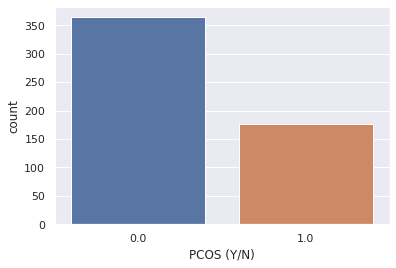

In [ ]:
#distribution of pcos
sns.set()
sns.countplot(df['PCOS (Y/N)'])

In [ ]:
#grouping the data
gypcos = df.groupby('PCOS (Y/N)').mean()

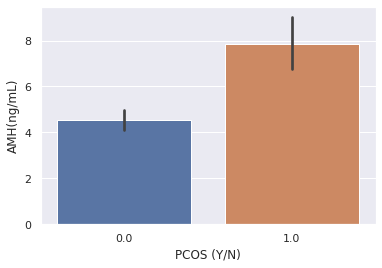

In [ ]:
sns.barplot(data=df,x="PCOS (Y/N)",y="AMH(ng/mL)")

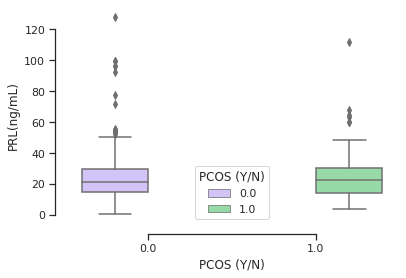

In [ ]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(y="PRL(ng/mL)", x="PCOS (Y/N)",
            hue="PCOS (Y/N)", palette=["m", "g"],
            data=df)
sns.despine(offset=10, trim=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


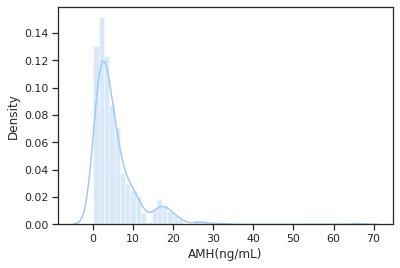

In [ ]:
sns.distplot(df['AMH(ng/mL)'])

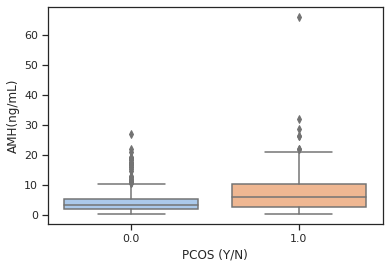

In [ ]:
sns.boxplot(data=df, y='AMH(ng/mL)',x='PCOS (Y/N)')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


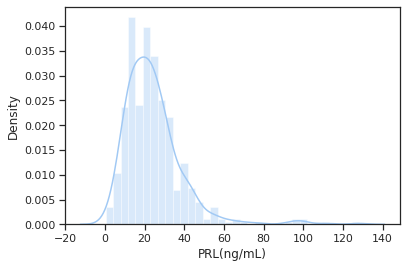

In [ ]:
sns.distplot(df['PRL(ng/mL)'])

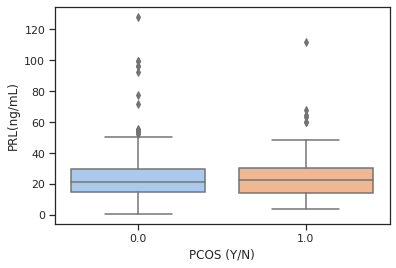

In [ ]:
sns.boxplot(data=df, x='PCOS (Y/N)',y='PRL(ng/mL)')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


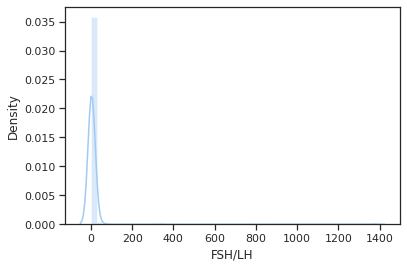

In [ ]:
sns.distplot(df['FSH/LH'])

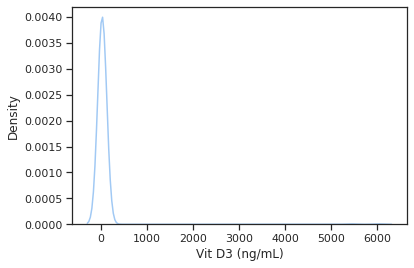

In [ ]:
sns.kdeplot(df['Vit D3 (ng/mL)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


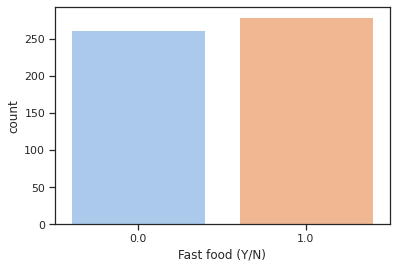

In [ ]:
sns.countplot(df['Fast food (Y/N)'])

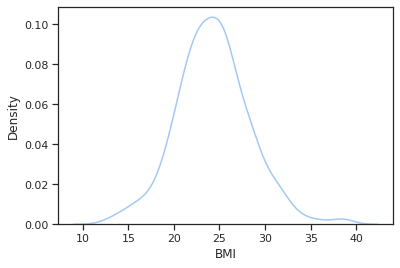

In [ ]:
sns.kdeplot(df['BMI'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


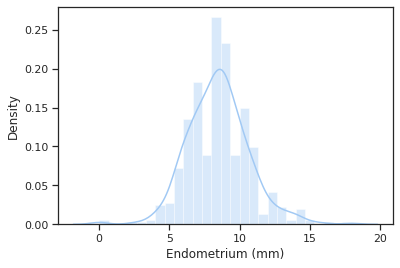

In [ ]:
sns.distplot(df['Endometrium (mm)'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


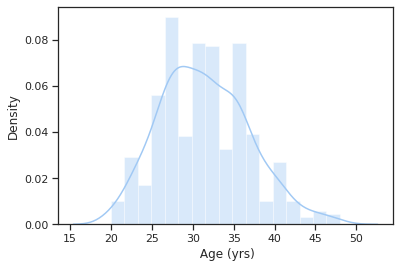

In [ ]:
sns.distplot(df[' Age (yrs)'])

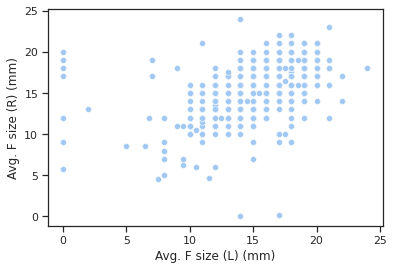

In [ ]:
sns.scatterplot(data=df, x="Avg. F size (L) (mm)",y="Avg. F size (R) (mm)")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


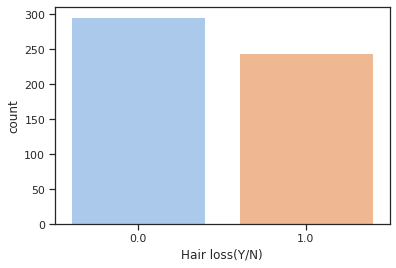

In [ ]:
sns.countplot(df['Hair loss(Y/N)'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


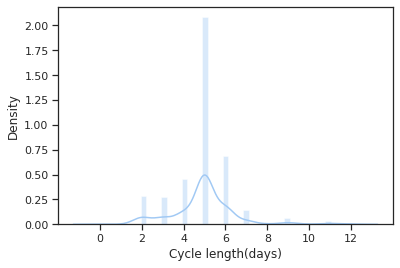

In [ ]:
sns.distplot(df['Cycle length(days)'])

In [ ]:
# grouping the data based on the target variable
df.groupby('PCOS (Y/N)').mean()

,Sl. No,Patient File No.,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
PCOS (Y/N),,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,264.357143,264.357143,32.065934,58.008791,156.197934,23.747397,13.755495,72.964286,19.200549,11.107390,2.307692,5.126374,8.057692,0.390110,0.315934,728.982437,223.975137,19.185956,2.612676,7.680132,37.543956,33.428571,0.891495,3.007810,4.531766,24.267857,29.295005,0.727261,99.203297,0.228022,0.129121,0.153846,0.392857,0.390110,0.384615,0.228022,114.620879,76.780220,4.351648,4.637363,14.687637,15.225824,8.315027
1.0,284.661017,284.661017,30.124294,62.985876,157.074847,25.470919,13.898305,73.830508,19.333333,11.268305,3.079096,4.559322,6.885311,0.361582,0.231638,532.042537,267.554232,5.174593,14.402328,5.310427,38.915254,34.689266,0.892717,2.926723,7.844633,24.431808,92.322633,0.371740,101.136723,0.683616,0.570621,0.621469,0.576271,0.694915,0.785311,0.288136,114.745763,77.231638,9.785311,10.762712,15.697740,15.916215,8.806780


In [ ]:
#splitting
X=df.drop(["PCOS (Y/N)","Sl. No","Patient File No.","Unnamed: 44"],axis = 1)
Y=df["PCOS (Y/N)"]

In [ ]:
# first ten features
df_dia = Y
df = X
df_n_2 = (df - df.mean()) / (df.std())              # standardization
df = pd.concat([Y,df_n_2.iloc[:,0:10]],axis=1)
df = pd.melt(df,id_vars="PCOS (Y/N)",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="PCOS (Y/N)", data=df,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

In [ ]:
df = pd.concat([Y,df_n_2.iloc[:,10:20]],axis=1)
df = pd.melt(df,id_vars="PCOS (Y/N)",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="PCOS (Y/N)", data=df,split=True, inner="quart")
plt.xticks(rotation=90)

In [ ]:
df = pd.concat([Y,df_n_2.iloc[:,20:44]],axis=1)
df = pd.melt(df,id_vars="PCOS (Y/N)",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,20))
sns.violinplot(x="features", y="value", hue="PCOS (Y/N)", data=df,split=True, inner="quart")
plt.xticks(rotation=90)

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x="features", y="value", hue="PCOS (Y/N)", data=df)
plt.xticks(rotation=90)

In [ ]:
print (X), print (Y)

In [ ]:
#train_test_split

X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.10, stratify=Y, random_state=3000)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

In [ ]:
X.var()

In [ ]:
#creating correlation map
correlation=X_train.corr()
#heatmap
plt.figure(figsize=(20,20))
sns.heatmap(correlation,cmap="YlGnBu", square=True, annot=True, annot_kws={'size':7}, fmt='.2f');

In [ ]:
X_train.corr()

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature feature that is correlated with anything other feature

def correlation ( dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
      for j in range(i):
        if abs(corr_matrix.iloc[i,j])> threshold:
          colname = corr_matrix.columns[i]
          col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train,0.8)
len (set(corr_features))

In [ ]:
corr_features

In [ ]:
X_train.ft=X_train.drop(corr_features, axis=1)
X_test.ft=X_test.drop(corr_features, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [ ]:
X_train.info

<bound method DataFrame.info of       Age (yrs)  Weight (Kg)  ...  Avg. F size (R) (mm)  Endometrium (mm)
133        28.0         70.0  ...                  18.0              12.0
73         26.0         70.0  ...                   6.0               9.8
222        27.0         65.0  ...                  15.0               8.0
233        31.0         50.0  ...                  15.0               9.0
334        30.0         62.0  ...                  11.0              11.0
..          ...          ...  ...                   ...               ...
445        26.0         72.0  ...                  20.0               6.0
153        29.0         52.0  ...                  19.0               8.0
381        35.0         60.0  ...                  15.0               6.5
302        26.0         64.0  ...                  14.0               9.5
12         25.0         74.0  ...                  21.0               8.0

[486 rows x 41 columns]>

Chi-square test for categorical values

In [ ]:
df=sns.read_excel('/content/pcos main data.xlsx',sheet_name='Full_new')

NameError: ignored

CATBooster Classifier

In [ ]:
X_train.ft.head()

,Age (yrs),Weight (Kg),Height(Cm),Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),Hip(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
133,28.0,70.0,157.0,15.0,70.0,18.0,11.0,2.0,5.0,5.0,0.0,1.0,342.16,1.99,3.41,3.58,42.0,0.857143,1.13,19.00,21.70,18.80,0.56,120.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,110.0,80.0,12.0,9.0,19.0,18.0,12.0
73,26.0,70.0,163.0,15.0,72.0,18.0,10.5,2.0,5.0,3.0,0.0,2.0,1.99,1.99,7.31,6.68,45.0,0.888889,2.95,0.35,22.88,14.36,0.27,92.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,110.0,80.0,3.0,4.0,10.5,6.0,9.8
222,27.0,65.0,158.0,17.0,78.0,20.0,11.1,2.0,5.0,5.0,1.0,0.0,148.52,148.52,4.96,1.75,35.0,0.914286,2.20,1.10,12.11,25.70,0.35,93.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,120.0,70.0,14.0,10.0,16.0,15.0,8.0
233,31.0,50.0,152.0,15.0,72.0,18.0,10.0,2.0,6.0,4.5,0.0,1.0,392.73,1.99,5.37,8.15,34.0,0.882353,25.91,16.80,14.41,23.91,0.25,92.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,120.0,80.0,7.0,5.0,17.0,15.0,9.0
334,30.0,62.0,152.0,15.0,74.0,18.0,11.5,2.0,5.0,6.0,1.0,0.0,296.31,296.31,0.21,0.92,38.0,0.921053,1.75,2.17,12.11,22.90,0.42,77.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,120.0,80.0,6.0,7.0,15.0,11.0,11.0


In [ ]:
features = list(X_train.ft.columns)

In [ ]:
model_cb = CatBoostClassifier(task_type='GPU',iterations=20,random_state=2021,eval_metric="F1")

In [ ]:
model_cb.fit(X_train.ft, Y_train, plot=True,eval_set=(X_test.ft,Y_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.382414
0:	learn: 0.7915194	test: 0.6666667	best: 0.6666667 (0)	total: 32.4ms	remaining: 616ms
1:	learn: 0.8766234	test: 0.8823529	best: 0.8823529 (1)	total: 58.6ms	remaining: 527ms
2:	learn: 0.8910891	test: 0.8823529	best: 0.8823529 (1)	total: 88.1ms	remaining: 499ms
3:	learn: 0.9144737	test: 0.8484848	best: 0.8823529 (1)	total: 103ms	remaining: 413ms
4:	learn: 0.9078947	test: 0.9090909	best: 0.9090909 (4)	total: 115ms	remaining: 346ms
5:	learn: 0.9389068	test: 0.8333333	best: 0.9090909 (4)	total: 131ms	remaining: 306ms
6:	learn: 0.9350649	test: 0.8571429	best: 0.9090909 (4)	total: 163ms	remaining: 302ms
7:	learn: 0.9679487	test: 0.8571429	best: 0.9090909 (4)	total: 197ms	remaining: 296ms
8:	learn: 0.9710611	test: 0.8333333	best: 0.9090909 (4)	total: 209ms	remaining: 256ms
9:	learn: 0.9774920	test: 0.8333333	best: 0.9090909 (4)	total: 268ms	remaining: 268ms
10:	learn: 0.9807692	test: 0.8333333	best: 0.9090909 (4)	total: 290ms	remaining: 237ms
11:	learn: 0.9872611

In [ ]:
#Accuracy Score of training data for Cat Boost

X_train_prediction=model_cb.predict(X_train.ft)
Training_data_Accuracy=accuracy_score(X_train_prediction, Y_train)
print('Accuracy of Training Data:',Training_data_Accuracy)

Accuracy of Training Data: 0.9423868312757202


In [ ]:
#Accuracy Score of testing data for Cat Boosat

X_test_prediction=model_cb.predict(X_test.ft)
Testing_data_Accuracy=accuracy_score(X_test_prediction, Y_test)
print('Accuracy of Testing Data:',Testing_data_Accuracy)

Accuracy of Testing Data: 0.9454545454545454


Logistic Regression

In [ ]:
#model training Logistic Regression

model1=LogisticRegression()

In [ ]:
#Training
model1.fit(X_train.ft, Y_train)

In [ ]:
#rfe=RFE(model1)
#rfe=rfe.fit_transform(X_train.ft, Y_train)

Model Evaluation

In [ ]:
#Accuracy Score of training data for logistic regression

X_train_prediction=model1.predict(X_train.ft)
Training_data_Accuracy=accuracy_score(X_train_prediction, Y_train)
print('Accuracy of Training Data:',Training_data_Accuracy)

In [ ]:
#Accuracy Score of testing data for logistic regression

X_test_prediction=model1.predict(X_test.ft)
Testing_data_Accuracy=accuracy_score(X_test_prediction, Y_test)
print('Accuracy of Testing Data:',Testing_data_Accuracy)

In [ ]:
#Precision Score of training data for logistic regression

X_train_prediction=model1.predict(X_train.ft)
Training_data_Precision1a=precision_score(X_train_prediction, Y_train)
print('Precision of Training Data:',Training_data_Precision1a)

In [ ]:
#Precision Score of testing data for logistic regression

X_test_prediction=model1.predict(X_test.ft)
Testing_data_Precision1b=precision_score(X_test_prediction, Y_test)
print('Precision of Testing Data:',Testing_data_Precision1b)

New code

In [ ]:
#Recall_Score of training data for logistic regression

X_train_prediction=model1.predict(X_train.ft)
Training_data_recall=recall_score(X_train_prediction, Y_train)
print('Recall(sensitivity) of Training Data:',Training_data_recall)

In [ ]:
#Recall_Score of testing data for logistic regression

X_test_prediction=model1.predict(X_test.ft)
Testing_data_recall=recall_score(X_test_prediction, Y_test)
print('Recall(sensitivity) of Testing Data:',Testing_data_recall)

In [ ]:
#F1_Score of training data for logistic regression

X_train_prediction=model1.predict(X_train.ft)
Training_data_F1=f1_score(X_train_prediction, Y_train)
print('F1_score of Training Data:',Training_data_F1)

In [ ]:
#F1_Score of testing data for logistic regression

X_test_prediction=model1.predict(X_test.ft)
Testing_data_F1=f1_score(X_test_prediction, Y_test)
print('F1_score of Testing Data:',Testing_data_F1)

In [ ]:
plt.subplots(figsize=(15,10))
cf_matrix1 = confusion_matrix(Y_test,X_test_prediction )
sns.heatmap(cf_matrix1/np.sum(cf_matrix1), annot = True, annot_kws = {'size':15}, cmap = 'tab20c_r')

# KNeighbours classifier

In [ ]:
#model training KNeighbours

model2=KNeighborsClassifier()

In [ ]:
#Training
model2.fit(X_train.ft, Y_train)

In [ ]:
#Accuracy Score of training data for kneighbours

X_train_prediction=model2.predict(X_train.ft)
Training_data_Accuracy=accuracy_score(X_train_prediction, Y_train)
print('Accuracy of Training Data:',Training_data_Accuracy)

In [ ]:
#Accuracy Score of testing data for kneighbours

X_test_prediction=model2.predict(X_test.ft)
Testing_data_Accuracy=accuracy_score(X_test_prediction, Y_test)
print('Accuracy of Testing Data:',Testing_data_Accuracy)

In [ ]:
#Precision Score of training data for KNeighbours Classifier

X_train_prediction=model2.predict(X_train.ft)
Training_data_Precision2a=precision_score(X_train_prediction, Y_train)
print('Precision of Training Data:',Training_data_Precision2a)

In [ ]:
#Precision Score of testing data for KNeighbours Classifier

X_test_prediction=model2.predict(X_test.ft)
Testing_data_Precision2b=precision_score(X_test_prediction, Y_test)
print('Precision of Testing Data:',Testing_data_Precision2b)

New code

In [ ]:
#Recall_Score of training data for KNeighbours Classifier

X_train_prediction=model2.predict(X_train.ft)
Training_data_recall=recall_score(X_train_prediction, Y_train)
print('Recall(sensitivity) of Training Data:',Training_data_recall)

In [ ]:
#Recall_Score of testing data for KNeighbours Classifier

X_test_prediction=model2.predict(X_test.ft)
Testing_data_recall=recall_score(X_test_prediction, Y_test)
print('Recall(sensitivity) of Testing Data:',Testing_data_recall)

In [ ]:
#F1_Score of training data for KNeighbours Classifier

X_train_prediction=model2.predict(X_train.ft)
Training_data_F1=f1_score(X_train_prediction, Y_train)
print('F1_score of Training Data:',Training_data_F1)

In [ ]:
#F1_Score of testing data for KNeighbours Classifier

X_test_prediction=model2.predict(X_test.ft)
Testing_data_F1=f1_score(X_test_prediction, Y_test)
print('F1_score of Testing Data:',Testing_data_F1)

In [ ]:
plt.subplots(figsize=(15,10))
cf_matrix2 = confusion_matrix(Y_test,X_test_prediction )
sns.heatmap(cf_matrix2/np.sum(cf_matrix2), annot = True, annot_kws = {'size':15}, cmap = 'plasma_r')

# *Decision* Tree

In [ ]:
model3= DecisionTreeClassifier()

In [ ]:
#Training
model3.fit(X_train.ft, Y_train)

In [ ]:
#Accuracy Score of training data for Decision Tree

X_train_prediction=model3.predict(X_train.ft)
Training_data_Accuracy=accuracy_score(X_train_prediction, Y_train)
print('Accuracy of Training Data:',Training_data_Accuracy)

In [ ]:
#Accuracy Score of testing data for Decision Tree

X_test_prediction=model3.predict(X_test.ft)
Testing_data_Accuracy=accuracy_score(X_test_prediction, Y_test)
print('Accuracy of Testing Data:',Testing_data_Accuracy)

In [ ]:
#Precision Score of training data for Decision Tree

X_train_prediction=model3.predict(X_train.ft)
Training_data_Precision3a=precision_score(X_train_prediction, Y_train)
print('Precision of Training Data:',Training_data_Precision3a)

In [ ]:
#Precision Score of testing data for Decision Tree

X_test_prediction=model3.predict(X_test.ft)
Testing_data_Precision3b=precision_score(X_test_prediction, Y_test)
print('Precision of Testing Data:',Testing_data_Precision3b)

New code

In [ ]:
#Recall_Score of training data for Decision Tree

X_train_prediction=model3.predict(X_train.ft)
Training_data_recall=recall_score(X_train_prediction, Y_train)
print('Recall(sensitivity) of Training Data:',Training_data_recall)

In [ ]:
#Recall_Score of testing data for Decision Tree

X_test_prediction=model3.predict(X_test.ft)
Testing_data_recall=recall_score(X_test_prediction, Y_test)
print('Recall(sensitivity) of Testing Data:',Testing_data_recall)

In [ ]:
#F1_Score of training data for Decision Tree

X_train_prediction=model3.predict(X_train.ft)
Training_data_F1=f1_score(X_train_prediction, Y_train)
print('F1_score of Training Data:',Training_data_F1)

In [ ]:
#F1_Score of testing data for Decision Tree

X_test_prediction=model3.predict(X_test.ft)
Testing_data_F1=f1_score(X_test_prediction, Y_test)
print('F1_score of Testing Data:',Testing_data_F1)

In [ ]:
plt.subplots(figsize=(15,10))
cf_matrix3 = confusion_matrix(Y_test,X_test_prediction )
sns.heatmap(cf_matrix3/np.sum(cf_matrix3), annot = True, annot_kws = {'size':15}, cmap = 'OrRd')

# Support vector machine classifier

In [ ]:
model4= svm.SVC()

In [ ]:
#Training
model4.fit(X_train.ft, Y_train)

In [ ]:
#Accuracy Score of training data for svm

X_train_prediction=model4.predict(X_train.ft)
Training_data_Accuracy=accuracy_score(X_train_prediction, Y_train)
print('Accuracy of Training Data:',Training_data_Accuracy)

In [ ]:
#Accuracy Score of testing data for svm

X_test_prediction=model4.predict(X_test.ft)
Testing_data_Accuracy=accuracy_score(X_test_prediction, Y_test)
print('Accuracy of Testing Data:',Testing_data_Accuracy)

In [ ]:
#Precision Score of training data for svm

X_train_prediction=model4.predict(X_train.ft)
Training_data_Precision4a=precision_score(X_train_prediction, Y_train)
print('Precision of Training Data:',Training_data_Precision4a)

In [ ]:
#Precision Score of testing data for svm

X_test_prediction=model4.predict(X_test.ft)
Testing_data_Precision4b=precision_score(X_test_prediction, Y_test)
print('Precision of Testing Data:',Testing_data_Precision4b)

New code

In [ ]:
#Recall_Score of training data for svm

X_train_prediction=model4.predict(X_train.ft)
Training_data_recall=recall_score(X_train_prediction, Y_train)
print('Recall(sensitivity) of Training Data:',Training_data_recall)

In [ ]:
#Recall_Score of testing data for svm

X_test_prediction=model4.predict(X_test.ft)
Testing_data_recall=recall_score(X_test_prediction, Y_test)
print('Recall(sensitivity) of Testing Data:',Testing_data_recall)


In [ ]:
#F1_Score of training data for svm

X_train_prediction=model4.predict(X_train.ft)
Training_data_F1=f1_score(X_train_prediction, Y_train)
print('F1_score of Training Data:',Training_data_F1)

In [ ]:
#F1_Score of testing data for svm

X_test_prediction=model4.predict(X_test.ft)
Testing_data_F1=f1_score(X_test_prediction, Y_test)
print('F1_score of Testing Data:',Testing_data_F1)

In [ ]:
plt.subplots(figsize=(15,10))
cf_matrix4 = confusion_matrix(Y_test,X_test_prediction )
sns.heatmap(cf_matrix4/np.sum(cf_matrix4), annot = True, annot_kws = {'size':15}, cmap = 'cividis_r')

# Random Forest classifier

In [ ]:
model5=RandomForestClassifier()

In [ ]:
#Training
model5.fit(X_train.ft, Y_train)

In [ ]:
#Accuracy Score of training data for random forest

X_train_prediction=model5.predict(X_train.ft)
Training_data_Accuracy=accuracy_score(X_train_prediction, Y_train)
print('Accuracy of Training Data:',Training_data_Accuracy)

In [ ]:
#Accuracy Score of testing data for random forest

X_test_prediction=model5.predict(X_test.ft)
Testing_data_Accuracy=accuracy_score(X_test_prediction, Y_test)
print('Accuracy of Testing Data:',Testing_data_Accuracy)

In [ ]:
#Precision Score of training data for RFC

X_train_prediction=model5.predict(X_train.ft)
Training_data_Precision5a=precision_score(X_train_prediction, Y_train)
print('Precision of Training Data:',Training_data_Precision5a)

In [ ]:
#Precision Score of testing data for RFC

X_test_prediction=model5.predict(X_test.ft)
Testing_data_Precision5b=precision_score(X_test_prediction, Y_test)
print('Precision of Testing Data:',Testing_data_Precision5b)

In [ ]:
#Recall_Score of training data for RFC

X_train_prediction=model5.predict(X_train.ft)
Training_data_recall=recall_score(X_train_prediction, Y_train)
print('Recall(sensitivity) of Training Data:',Training_data_recall)

In [ ]:
#Recall_Score of testing data for RFC

X_test_prediction=model5.predict(X_test.ft)
Testing_data_recall=recall_score(X_test_prediction, Y_test)
print('Recall(sensitivity) of Testing Data:',Testing_data_recall)

In [ ]:
#F1_Score of training data for RFC

X_train_prediction=model5.predict(X_train.ft)
Training_data_F1=f1_score(X_train_prediction, Y_train)
print('F1_score of Training Data:',Training_data_F1)

In [ ]:
#F1_Score of testing data for RFC

X_test_prediction=model5.predict(X_test.ft)
Testing_data_F1=f1_score(X_test_prediction, Y_test)
print('F1_score of Testing Data:',Testing_data_F1)

In [ ]:
select = RFE(RandomForestClassifier(n_estimators=100,random_state=42),n_features_to_select=15)
select.fit(X_train.ft,Y_train)
X_train_selected = select.transform(X_train.ft)

print("X_train.shape: {}".format(X_train.ft.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

In [ ]:
mask = select.get_support()
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())
plt.show()

In [ ]:
X_test_selected = select.transform(X_test.ft)

model5.fit(X_train.ft,Y_train)
print("Accuracy Score with all features: {:,.3f}".format(model5.score(X_test.ft,Y_test)))

model5.fit(X_train_selected,Y_train)
print("Accuracy Score with Selected features: {:,.3f}".format(model5.score(X_test_selected,Y_test)))

In [ ]:
plt.subplots(figsize=(15,10))
cf_matrix5 = confusion_matrix(Y_test,X_test_prediction )
sns.heatmap(cf_matrix5/np.sum(cf_matrix5), annot = True, annot_kws = {'size':15}, cmap = 'gist_heat_r')

# Naive Bayes

In [ ]:
model6 = BernoulliNB()


In [ ]:
model6.fit(X_train.ft, Y_train)

In [ ]:
#Accuracy Score of training data for Naive bayes

X_train_prediction=model6.predict(X_train.ft)
Training_data_Accuracy=accuracy_score(X_train_prediction, Y_train)
print('Accuracy of Training Data:',Training_data_Accuracy)

In [ ]:
#Accuracy Score of testing data for Naive bayes

X_test_prediction=model6.predict(X_test.ft)
Testing_data_Accuracy=accuracy_score(X_test_prediction, Y_test)
print('Accuracy of Testing Data:',Testing_data_Accuracy)

In [ ]:
X_train_prediction=model6.predict(X_train.ft)
Training_data_Precision6a=precision_score(X_train_prediction, Y_train)
print('Precision of Training Data:',Training_data_Precision6a)

In [ ]:
X_test_prediction=model6.predict(X_test.ft)
Testing_data_Precision6b=precision_score(X_test_prediction, Y_test)
print('Precision of Testing Data:',Testing_data_Precision6b)

In [ ]:
#Recall_Score of training data for NB

X_train_prediction=model6.predict(X_train.ft)
Training_data_recall=recall_score(X_train_prediction, Y_train)
print('Recall(sensitivity) of Training Data:',Training_data_recall)

In [ ]:
#Recall_Score of testing data for NB

X_test_prediction=model6.predict(X_test.ft)
Testing_data_recall=recall_score(X_test_prediction, Y_test)
print('Recall(sensitivity) of Testing Data:',Testing_data_recall)

In [ ]:
#F1_Score of training data for NB

X_train_prediction=model6.predict(X_train.ft)
Training_data_F1=f1_score(X_train_prediction, Y_train)
print('F1_score of Training Data:',Training_data_F1)

In [ ]:
#F1_Score of testing data for NB

X_test_prediction=model6.predict(X_test.ft)
Testing_data_F1=f1_score(X_test_prediction, Y_test)
print('F1_score of Testing Data:',Testing_data_F1)

In [ ]:
#confusion matrix
plt.subplots(figsize=(15,10))
cf_matrix6 = confusion_matrix(Y_test,X_test_prediction )
sns.heatmap(cf_matrix6/np.sum(cf_matrix6), annot = True, annot_kws = {'size':15}, cmap = 'YlOrRd_r')

Building Predictive System

In [ ]:
input_data=(33,52,152,22.5,11,72,18,11,2,5,8,0,1,1.99,1.99,5.84,4.54,38,32,0.842,3.74,1,33.68,31.55,0.25,92,0,1,1,1,1,1,0,110,70,6,9,13,13,6,)
#change input to numpy array
input_data_as_numpy_array=np.asarray(input_data)
#reshape array
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model_cb.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
  print('you do not have PCOS')
else:
    print('seek medical help, you have PCOS')